# Functions

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [26]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA

# Load Experimental data

## select files and channels

In [27]:
filenames = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\merge\\merge_0727_OUsmooth_Bright_RL_G4.5_5min_Q100_6.5mW_1Hz.mat']
dt = 1/60
chnum = 26
x_list, T_list, rstate_list = expSnR(filenames, dt, 'OLED', [chnum])
for i in range(len(x_list)):
    rstate_list[i] = rstate_list[i][chnum-1,:]

In [4]:
xstate = EqualState(x_list[0], 6)[0]

## RFProperties

In [5]:
annots = loadmat('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\30Hz_27_RF_15min\\unsort\\RF_properties'
                 , squeeze_me=True)
RFP = annots['RF_properties']
RFP[chnum-1].dtype

dtype([('Amplitude', 'O'), ('X_Coor', 'O'), ('X_Width', 'O'), ('Y_Coor', 'O'), ('Y_Width', 'O'), ('Angle', 'O'), ('radius', 'O')])

In [6]:
def R_el(a,b,o):
    return a*b/np.sqrt(a**2*np.sin(o)**2+ b**2*np.cos(o)**2)

In [7]:
BS = loadmat('C:\\Users\\llinc\\GitHub\\retina_exp\\calibration\\20200219oled_calibration\\oled_boundary_set'
                 , squeeze_me=True)

In [8]:
hRFsize = R_el(RFP[chnum-1]['X_Width'], RFP[chnum-1]['Y_Width'] ,RFP[chnum-1]['Angle'] )/BS['micro_per_pixel']
print(hRFsize/5)
cellpos = (RFP[chnum-1]['X_Coor']-BS['leftx_bar'])
if cellpos%5<2.5:
    print('偏左')
else:
    print('偏右')

8.726916216064058
偏左


In [9]:
bar_on_OLED = np.zeros(189)
bar_on_OLED[(x_list[0][0]-BS['leftx_bar']-BS['bar_wid']):(x_list[0][0]-BS['leftx_bar']+BS['bar_wid']+1)] = 1

<BarContainer object of 1 artists>

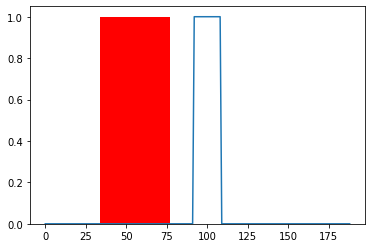

In [10]:
plt.plot(bar_on_OLED)
plt.bar(cellpos,1,width=hRFsize, color = 'r')

In [11]:
sti = x_list[0]
sti = sti.astype(float)

In [12]:
stipos = sti-BS['leftx_bar']

[0. 1. 2. 3. 4. 5. 6. 7.]


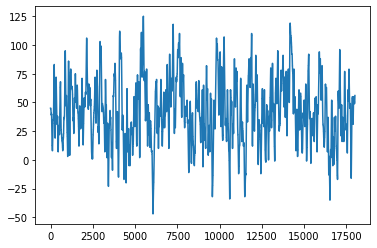

In [21]:
disBC = (stipos-np.round(cellpos))/5
# xstate = np.zeros_like(disBC)
disBC[disBC<-3.5] = 0+1000
disBC[disBC<-2.5] = 1+1000
disBC[disBC<-1.5] = 2+1000
disBC[disBC<-0.5] = 3+1000
disBC[disBC<0.5] = 4+1000
disBC[disBC<1.5] = 5+1000
disBC[disBC<2.5] = 6+1000
disBC[disBC<3.5] = 7+1000
disBC = disBC-1000
disBC[disBC<0] = 0
plt.plot((stipos-round(cellpos)))
print(np.unique(disBC))

# Difine $x_{state}$

(array([14875.,   149.,   186.,     0.,   245.,   407.,     0.,   547.,
          761.,   836.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

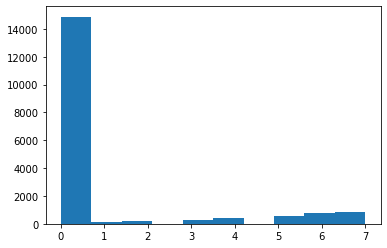

In [22]:
plt.hist(disBC)

# Cal. MI

In [23]:
window = [-1,1] # second
timeshift, Information = PIfunc(rstate_list[i], disBC, xstate, dt, window)

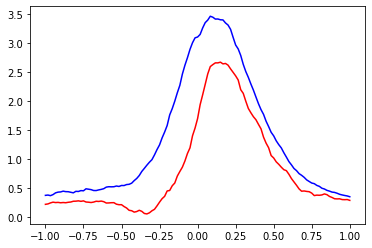

In [24]:
plt.plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')], 'r-')
plt.plot(timeshift,Information[('Beer','UIv')]+Information[('Beer','Red')], 'b-')